<a href="https://colab.research.google.com/github/shamim237/MNIST-DIGIT-RECOGNITION/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras import layers
from keras.datasets import mnist

from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential

from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
import cv2
import os 
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

%matplotlib inline

from keras import backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

Corresponding class to the image:  0


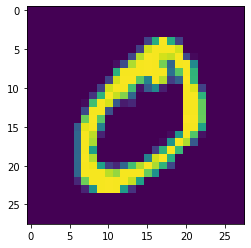

In [ ]:
plt.imshow(x_train[1])


print("Corresponding class to the image: ",y_train[1])

In [ ]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
input_shape = (img_rows * img_cols)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs =15

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Dense(2048, activation= 'relu', input_shape=(784, )))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation= 'relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_57 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_60 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_61 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer= Adam(lr= 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.8095 - accuracy: 0.7831 - val_loss: 0.1927 - val_accuracy: 0.9453
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1411 - accuracy: 0.9598 - val_loss: 0.1182 - val_accuracy: 0.9655
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0918 - accuracy: 0.9731 - val_loss: 0.0900 - val_accuracy: 0.9718
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0611 - accuracy: 0.9821 - val_loss: 0.0797 - val_accuracy: 0.9752
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0415 - accuracy: 0.9883 - val_loss: 0.0736 - val_accuracy: 0.9780
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0770 - val_accuracy: 0.9748
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0739 - val_accuracy: 0.9783
Epoch 

In [ ]:
model.save('./model.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07461471110582352
Test accuracy: 0.984000027179718


In [ ]:
test_data = x_test[0].reshape(1, 784)
test_data.shape

(1, 784)

In [ ]:

predict = model.predict(test_data)
predict = np.argmax(predict, axis=1)
predict

array([7])

In [ ]:
img = cv2.imread("/content/drive/MyDrive/download.png")

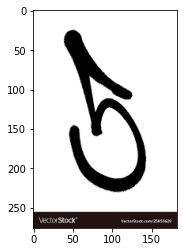

In [ ]:
plt.imshow(img)

In [ ]:
img = cv2.resize(img, (28, 28))
img.shape

(28, 28, 3)

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(28, 28)

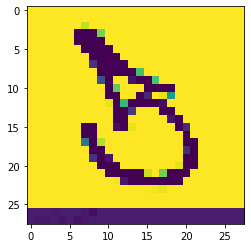

In [ ]:
plt.imshow(img_gray)

In [ ]:
img = img_gray.reshape(1, 28*28)

In [ ]:
pred = model.predict(img)
output = np.argmax(pred, axis=1)

In [ ]:
output

array([3])